## Dijkstra's Shortest Path Algorithm

Jacob L. Fine

Given a graph, we often wish to calculate the shortest path between some initial node, i.e., 'source' node, and every other node in the graph. We can assign weights to each edge, which in the real world, can represent distances, times, costs, etc., between objects connected in some graph. This can be particularly useful for navigation in a GPS or video game map, where the shortest path is desirable. 

Dijkstra's shortest path algorithm is a convenient way to find these shortest paths. We start with a source node, and iterate through neighboring nodes and repeatedly select the node that results in the smallest distance from the source node. We use a priority queue to explore the nodes, where higher priority is assigned to nodes with lower distances to the source node. 

Shortest paths from Jerry to others:
{'Jerry': 0, 'Elaine': 20, 'Kramer': 30, 'George': 10, 'Larry': 30, 'Newman': 60, 'Susie': 50}





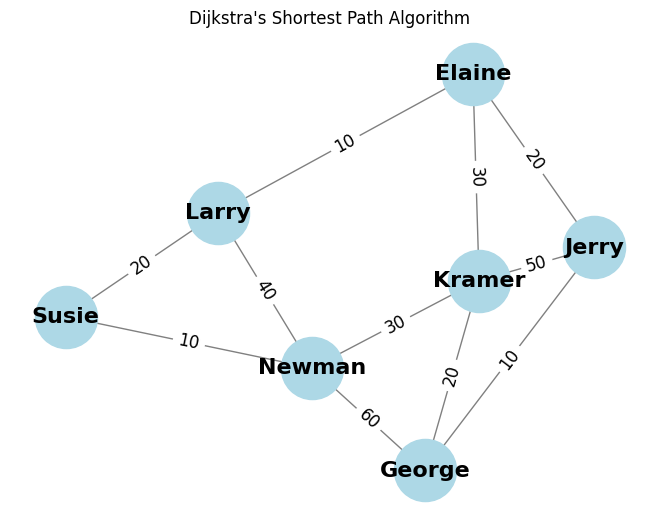

In [59]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def dijkstra(graph, start):
    # initialize the shortest path dictionary, storing the initial lengths of the shortest paths (initialized to infinity)
    shortest_paths = {vertex: float('inf') for vertex in graph}
    shortest_paths[start] = 0  # the shortest path from the source node to itself is 0

    # priority queue to hold vertices to explore, which uses a min-heap data structure (binary tree where each parent node value is less than its children) for extraction of minimum distance nodes
    priority_queue = [(0, start)]

    while priority_queue:  # while the priority queue is not empty; it will be a list of edge weight and node name pairs, with nodes with smallest weight first.
        # use a priority queue to continually find the neighbor node with the shortest distance. We use this priority queue to determine which nodes to prioritize in our search.
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # if the current distance found by the priority queue is larger than the current shortest path, skip it
        if current_distance > shortest_paths[current_vertex]: 
            continue

        # explore neighbor nodes and consider different lengths of distances
        for neighbor, weight in graph[current_vertex].items():  # given our current vertex, explore its neighbors and retrieve their weights
            distance = current_distance + weight  # the distances to consider, based on the current distance from the source node and the neighbor nodes

            # when a distance shorter than the current shortest path to a given node is found, update the value to this distance
            if distance < shortest_paths[neighbor]:
                shortest_paths[neighbor] = distance
                # add this shortest distance to the priority queue to explore more
                heapq.heappush(priority_queue, (distance, neighbor))

    return shortest_paths

# Example graph, as an adjanency list
graph = {
    'Jerry': {'Elaine': 20, 'Kramer': 50, 'George': 10},
    'Elaine': {'Jerry': 20, 'Kramer': 30, 'Larry': 10},
    'Kramer': {'Jerry': 50, 'Elaine': 30, 'George': 20, 'Newman': 30},
    'George': {'Jerry': 10, 'Kramer': 20, 'Newman': 60},
    'Larry': {'Elaine': 10, 'Newman': 40, 'Susie': 20},
    'Newman': {'Kramer': 30, 'George': 60, 'Larry': 40, 'Susie': 10},
    'Susie': {'Larry': 20, 'Newman': 10}
}

G = nx.Graph()

# calls the function based on the starting node 

start_vertex = 'Jerry'
shortest_paths = dijkstra(graph, start_vertex)
print('Shortest paths from Jerry to others:')
print(shortest_paths)
print('')
print('')
print('')


# add edges to the graph initially stored as an adjacency list
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

# actually draw the graph
pos = nx.spring_layout(G, k=0.6)   # Find the positions of each node
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold', edge_color='gray')

# label the edges with weights
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title('Dijkstra\'s Shortest Path Algorithm')
plt.show()
